
# Time Series Analysis using ARIMA and GARCH Modeling

## 1. Introduction
In this notebook, we will perform time series analysis using the ARIMA model.  
We will use the **AirPassengers dataset** with monthly totals of international airline passengers from 1949 to 1960.

## 2. Import Required Libraries

In [ ]:
!pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model


## 3. Load the Dataset

Using the AirPassengers dataset to records monthly totals of international airline passengers (in '000).

In [ ]:

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121



## 4. Visualize the Time Series

Plotting the original series to understand its structure and trends.

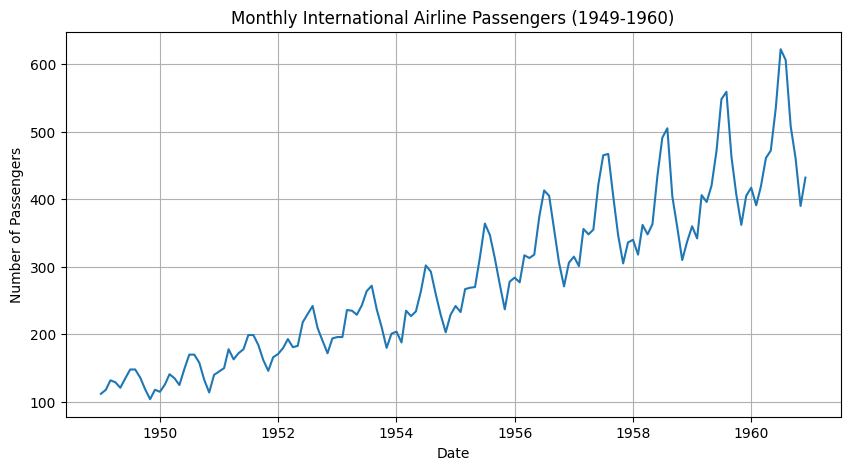

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(df)
plt.title('Monthly International Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()



## 5. Stationarity Check

A stationary series has constant mean and variance over time.  
We first difference the series and apply the **Augmented Dickey-Fuller (ADF)** test.


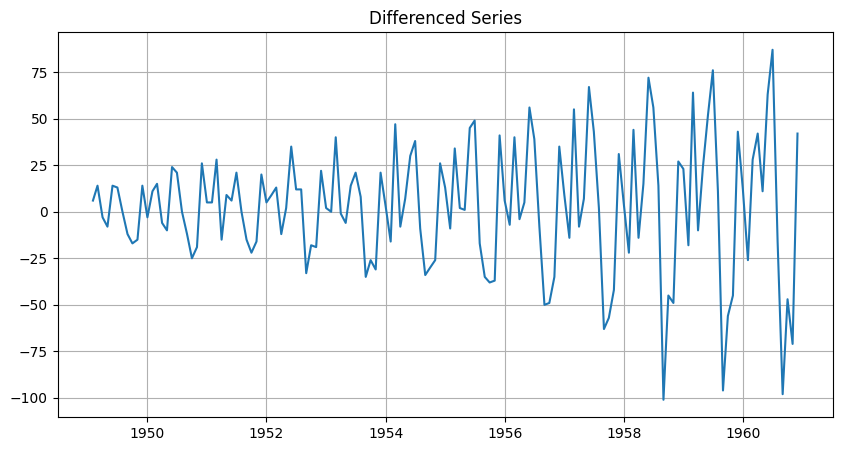

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [ ]:

# Differencing
df_diff = df.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10,5))
plt.plot(df_diff)
plt.title('Differenced Series')
plt.grid(True)
plt.show()

# ADF Test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_diff['Passengers'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])



## 6. Identify ARIMA Parameters (p, d, q)

We use ACF and PACF plots to determine the appropriate values of **p** and **q**.


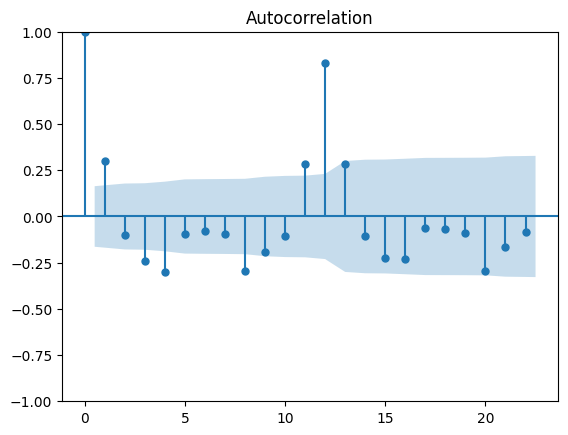

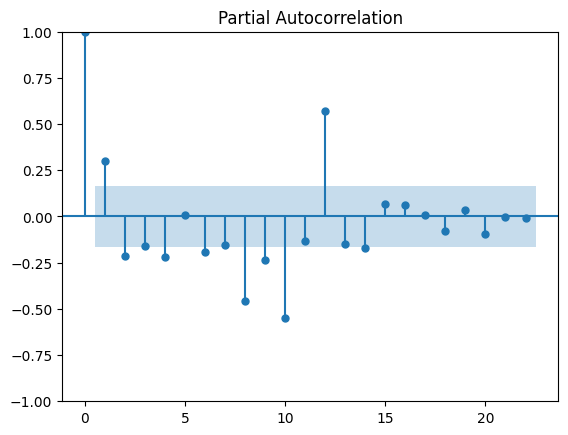

In [ ]:

# ACF and PACF plots
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()



## 7. Build and Fit the ARIMA Model

Fitting **ARIMA(2,1,2)** model based on the plots

In [ ]:

# ARIMA Model
model = ARIMA(df['Passengers'], order=(2,1,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sun, 27 Apr 2025   AIC                           1353.347
Time:                        05:34:49   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.000      -2.087      -1.600
ma.L2          0.9953      0.135      7.398      0.000       0.732       1.259
sigma2       665.9646    113.887      5.848      0.000     442.751     889.178
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


## 8. Forecast Future Values

Forecasting the next 12 months and plot the forecast along with confidence intervals.

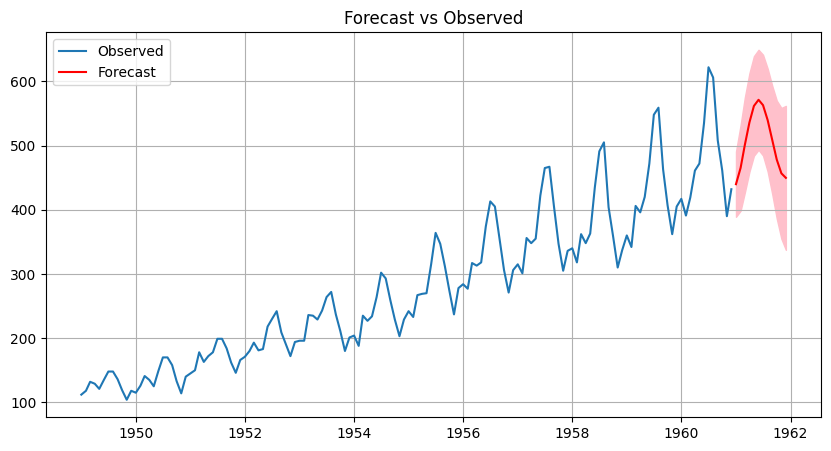

In [ ]:

forecast = model_fit.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(df, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title('Forecast vs Observed')
plt.legend()
plt.grid(True)
plt.show()



## 9. Volatility Analysis Using GARCH Model

Applying a **GARCH(1,1)** model to the differenced series.

In [ ]:

returns = df_diff['Passengers']
model_garch = arch_model(returns, vol='Garch', p=1, q=1)
model_garch_fit = model_garch.fit(disp='off')
model_garch_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -679.255
Distribution:                  Normal   AIC:                           1366.51
Method:            Maximum Likelihood   BIC:                           1378.36
                                        No. Observations:                  143
Date:                Sun, Apr 27 2025   Df Residuals:                      142
Time:                        05:34:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.1567      1.810      1.191      0.233 [ -1.391,  5.705]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          9.6757     16.776      0.577      0.564    [-23.204, 42.556]
alpha[1]       0.0555  6.020e-02      0.923      0.356 [-6.245e-02,  0.174]
beta[1]        0.9445  8.999e-02     10.495  9.095e-26    [  0.768,  1.121]
===========================================================================

Covariance estimator: robust
"""


## 10. Conclusion

- ARIMA model provided reasonable forecasting for the AirPassengers dataset.
- Differencing made the series stationary, as verified by the ADF test.
-GARCH model offered insights into volatility patterns.